In [1]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

now = datetime.now()

In [2]:
url_page = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'

page = requests.get(url_page).text 
soup = BeautifulSoup(page, "lxml")

tabla = soup.find('table', attrs={'id': 'ctl00_Contenido_tblAcciones'})
tabla
name=""
price=""
var = ""
maxima = ""
minima = ""
nroFila=0
for fila in tabla.find_all("tr"):
    #for row in  tabla.find_all("td")::
    nroCelda=0
    for celda in fila.find_all('td'):
        if nroCelda==0:
            name=celda.text
            print("Accion:", name)
        if nroCelda==1:
            price=celda.text
            print("Valor:", price)
        if nroCelda==2:
            var=celda.text
            print("Variacion:", var)
        if nroCelda==3:
            maxima=celda.text
            print("Maxima:", maxima)
        if nroCelda==4:
            minima=celda.text
            print("Minima:", minima)
        nroCelda=nroCelda+1
    nroFila=nroFila+1

    with open('bolsa_acciones.csv', 'a') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow([name, price , var , maxima , minima ,now.date()])
        

Accion: ACCIONA
Valor: 164,4000
Variacion: 0,74
Maxima: 165,1000
Minima: 162,2000
Accion: ACERINOX
Valor: 11,9950
Variacion: -0,37
Maxima: 12,1250
Minima: 11,9050
Accion: ACS
Valor: 22,7000
Variacion: -1,26
Maxima: 23,2400
Minima: 22,6600
Accion: AENA
Valor: 141,7500
Variacion: -0,18
Maxima: 142,9500
Minima: 141,0500
Accion: ALMIRALL
Valor: 12,7500
Variacion: -0,86
Maxima: 12,9600
Minima: 12,7300
Accion: AMADEUS
Valor: 57,1000
Variacion: 0,25
Maxima: 57,5600
Minima: 56,3200
Accion: ARCELORMIT.
Valor: 29,1350
Variacion: -0,31
Maxima: 29,5800
Minima: 28,4450
Accion: B.SANTANDER
Valor: 3,2610
Variacion: -2,85
Maxima: 3,3505
Minima: 3,2245
Accion: BA.SABADELL
Valor: 0,6548
Variacion: -1,83
Maxima: 0,6676
Minima: 0,6506
Accion: BANKINTER
Valor: 4,7080
Variacion: 0,06
Maxima: 4,7660
Minima: 4,6600
Accion: BBVA
Valor: 5,6150
Variacion: -1,20
Maxima: 5,7440
Minima: 5,5620
Accion: CAIXABANK
Valor: 2,5490
Variacion: -2,04
Maxima: 2,5960
Minima: 2,5280
Accion: CELLNEX
Valor: 54,0800
Variacion: -0

In [3]:
df = pd.read_csv('bolsa_acciones.csv')
df.columns = ["Nombre", "Precio", "Variacion", "Maxima", "Minima", "Fecha"]
df.to_csv('bolsa_acciones.csv')

print(df)

          Nombre    Precio Variacion    Maxima    Minima       Fecha
0        ACCIONA  164,4000      0,74  165,1000  162,2000  2021-10-27
1       ACERINOX   11,9950     -0,37   12,1250   11,9050  2021-10-27
2            ACS   22,7000     -1,26   23,2400   22,6600  2021-10-27
3           AENA  141,7500     -0,18  142,9500  141,0500  2021-10-27
4       ALMIRALL   12,7500     -0,86   12,9600   12,7300  2021-10-27
5        AMADEUS   57,1000      0,25   57,5600   56,3200  2021-10-27
6    ARCELORMIT.   29,1350     -0,31   29,5800   28,4450  2021-10-27
7    B.SANTANDER    3,2610     -2,85    3,3505    3,2245  2021-10-27
8    BA.SABADELL    0,6548     -1,83    0,6676    0,6506  2021-10-27
9      BANKINTER    4,7080      0,06    4,7660    4,6600  2021-10-27
10          BBVA    5,6150     -1,20    5,7440    5,5620  2021-10-27
11     CAIXABANK    2,5490     -2,04    2,5960    2,5280  2021-10-27
12       CELLNEX   54,0800     -0,15   54,7200   53,8400  2021-10-27
13  CIE AUTOMOT.   23,0800      0,

In [4]:
df['Variacion'] = df['Variacion'].apply(lambda x: x.replace(',','.'))

df['Variacion'] = df['Variacion'].astype(float)

print(df.sort_values(by=['Variacion']))

maxs = df['Variacion'].max()
minimo= df['Variacion'].min()

print("Maximo de Variación:")
print(maxs)
print("Mínimo de Variación:")
print(minimo)


          Nombre    Precio  Variacion    Maxima    Minima       Fecha
7    B.SANTANDER    3,2610      -2.85    3,3505    3,2245  2021-10-27
18  GRIFOLS CL.A   19,8500      -2.36   20,3900   19,8500  2021-10-27
11     CAIXABANK    2,5490      -2.04    2,5960    2,5280  2021-10-27
8    BA.SABADELL    0,6548      -1.83    0,6676    0,6506  2021-10-27
28    PHARMA MAR   69,1800      -1.76   70,2400   69,0600  2021-10-27
2            ACS   22,7000      -1.26   23,2400   22,6600  2021-10-27
10          BBVA    5,6150      -1.20    5,7440    5,5620  2021-10-27
4       ALMIRALL   12,7500      -0.86   12,9600   12,7300  2021-10-27
30        REPSOL   11,4660      -0.64   11,5800   11,3200  2021-10-27
31  SIEMENS GAME   22,1800      -0.54   22,4000   21,9400  2021-10-27
25  MELIA HOTELS    6,3020      -0.51    6,3360    6,1520  2021-10-27
19           IAG    1,8980      -0.50    1,9255    1,8870  2021-10-27
1       ACERINOX   11,9950      -0.37   12,1250   11,9050  2021-10-27
6    ARCELORMIT.   2

In [5]:
df

,Nombre,Precio,Variacion,Maxima,Minima,Fecha
0,ACCIONA,"164,4000",0.74,"165,1000","162,2000",2021-10-27
1,ACERINOX,"11,9950",-0.37,"12,1250","11,9050",2021-10-27
2,ACS,"22,7000",-1.26,"23,2400","22,6600",2021-10-27
3,AENA,"141,7500",-0.18,"142,9500","141,0500",2021-10-27
4,ALMIRALL,"12,7500",-0.86,"12,9600","12,7300",2021-10-27
5,AMADEUS,"57,1000",0.25,"57,5600","56,3200",2021-10-27
6,ARCELORMIT.,"29,1350",-0.31,"29,5800","28,4450",2021-10-27
7,B.SANTANDER,"3,2610",-2.85,"3,3505","3,2245",2021-10-27
8,BA.SABADELL,"0,6548",-1.83,"0,6676","0,6506",2021-10-27
9,BANKINTER,"4,7080",0.06,"4,7660","4,6600",2021-10-27


No handles with labels found to put in legend.
No handles with labels found to put in legend.


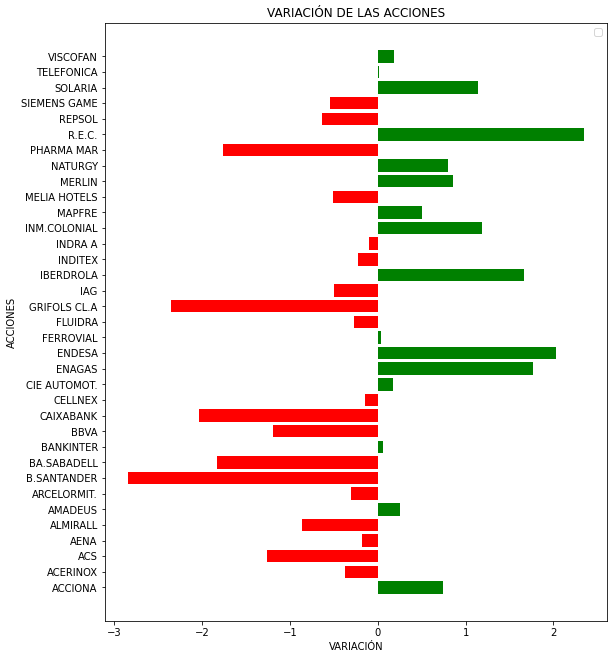

In [6]:

eje_x = list(df['Nombre'])
eje_y = list(df['Variacion'])

plt.figure(figsize=(9,11))
plt.barh(eje_x, eje_y, color=(df['Variacion'] > 0).map({True: 'green',False: 'red'}))
plt.legend()
plt.ylabel('ACCIONES')
plt.xlabel('VARIACIÓN')
plt.title('VARIACIÓN DE LAS ACCIONES')
plt.legend()

plt.show()


In [7]:

maxs = df['Variacion'].max()

minimo= df['Variacion'].min()


print("Maximo de Variación:")
print(maxs)

print("Mínimo de Variación:")
print(minimo)

Maximo de Variación:
2.35
Mínimo de Variación:
-2.85


In [13]:
#muestra las filas que quiero del archivo bolsa madrid este es por indice

df.iloc [[7,10,30,33]]

,Nombre,Precio,Variacion,Maxima,Minima,Fecha
7,B.SANTANDER,"3,2610",-2.85,"3,3505","3,2245",2021-10-27
10,BBVA,"5,6150",-1.20,"5,7440","5,5620",2021-10-27
30,REPSOL,"11,4660",-0.64,"11,5800","11,3200",2021-10-27
33,TELEFONICA,"3,8135",0.01,"3,8135","3,7685",2021-10-27


In [18]:
#imprime la variacion de Santander
santander=df.loc[7, 'Variacion']
santander

bbva=df.loc[10, 'Variacion']
bbva

repsol=df.loc[30, 'Variacion']
repsol

telefonica=df.loc[33, 'Variacion']
telefonica


print(santander)
print(bbva)
print(repsol)
print(telefonica)

-2.85
-1.2
-0.64
0.01


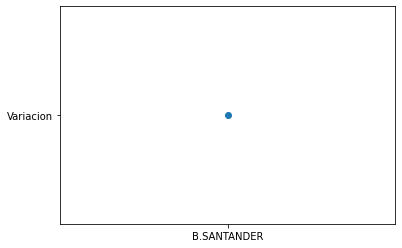

In [20]:
# Importar el módulo pyplot con el alias plt
import matplotlib.pyplot as plt
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['B.SANTANDER'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('Santander.png')
# Mostrar el gráfico
plt.show()


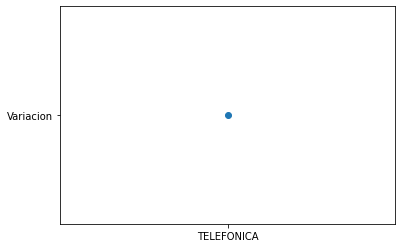

In [21]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['TELEFONICA'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('Telefonica.png')
# Mostrar el gráfico
plt.show()

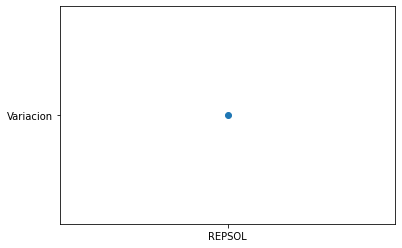

In [22]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['REPSOL'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('repsol.png')
# Mostrar el gráfico
plt.show()

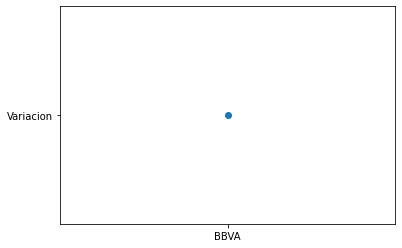

In [23]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['BBVA'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('BBVA.png')
# Mostrar el gráfico
plt.show()